In [1]:
import pandas as pd
import numpy as np
# consejos: utiliza robustscaler para escalar las variables, 
# Random Forest Regression y kneighbors son los que mejor resultados dan
# pero lo que da puntuaciones más altas es usar H2O es un poco más coñazo configurarlo pero es el que más accuracy da.

In [2]:
diamantes = pd.read_csv('./input/diamonds_test.csv')
diamantes.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


In [3]:
diamantes.shape

(13449, 10)

In [4]:
diamantes.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [5]:
diamantes.describe()

,id,carat,depth,table,x,y,z
count,13449.00000,13449.000000,13449.000000,13449.000000,13449.000000,13449.000000,13449.000000
mean,6724.00000,0.798023,61.743156,57.484170,5.732387,5.734190,3.540980
std,3882.53622,0.470641,1.436475,2.232334,1.117514,1.109695,0.734237
min,0.00000,0.200000,43.000000,50.100000,0.000000,0.000000,0.000000
25%,3362.00000,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000
50%,6724.00000,0.700000,61.800000,57.000000,5.710000,5.720000,3.530000
75%,10086.00000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,13448.00000,4.500000,73.600000,73.000000,10.230000,10.160000,31.800000


In [6]:
correlacionDiamantes = diamantes.corr()

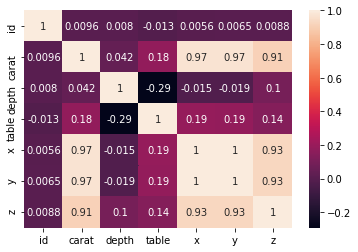

In [7]:
import seaborn as sns
ax_corr = sns.heatmap(correlacionDiamantes, annot = True)

In [8]:
print(diamantes.dtypes)

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object


In [9]:
diamantes.describe(include=object)

,cut,color,clarity
count,13449,13449,13449
unique,5,7,8
top,Ideal,G,SI1
freq,5347,2800,3322


In [10]:
diamantes.cut.value_counts()

Ideal        5347
Premium      3445
Very Good    3001
Good         1260
Fair          396
Name: cut, dtype: int64

In [11]:
def num_cut(row):
    groups = {
        "Ideal" : 1,
        "Premium" : 2,
        "Very Good" : 3,
        "Good" : 4,
        "Fair" : 5
    }
    return groups[row]

In [12]:
diamantes['cut'] = diamantes['cut'].apply(lambda x: num_cut(x))
diamantes.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,2,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,1,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,2,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,2,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,1,F,SI1,61.8,55.0,5.27,5.22,3.24


In [13]:
diamantes.color.value_counts()

G    2800
E    2484
F    2387
H    2072
D    1661
I    1313
J     732
Name: color, dtype: int64

In [14]:
def num_color(row):
    groups = {
        "D" : 1,
        "E" : 2,
        "F" : 3,
        "G" : 4,
        "H" : 5,
        "I" : 6,
        "J" : 7
    }
    return groups[row]

In [15]:
diamantes['color'] = diamantes['color'].apply(lambda x: num_color(x))
diamantes.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,2,5,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,1,6,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,2,4,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,2,3,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,1,3,SI1,61.8,55.0,5.27,5.22,3.24


In [16]:
diamantes.clarity.value_counts()

SI1     3322
VS2     3065
SI2     2266
VS1     2064
VVS2    1217
VVS1     909
IF       427
I1       179
Name: clarity, dtype: int64

In [17]:
def num_clarity(row):
    groups = {
        "IF" : 1,
        "VVS1" : 2,
        "VVS2" : 3,
        "VS1" : 4,
        "VS2" : 5,
        "SI1" : 6,
        "SI2" : 7,
        "I1" : 8
    }
    return groups[row]

In [18]:
diamantes['clarity'] = diamantes['clarity'].apply(lambda x: num_clarity(x))
diamantes.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,2,5,7,62.2,58.0,6.69,6.60,4.13
1,1,0.51,1,6,6,62.5,57.0,5.07,5.10,3.18
2,2,2.03,2,4,6,61.9,59.0,8.14,8.09,5.02
3,3,1.21,2,3,6,60.0,60.0,6.96,6.91,4.16
4,4,0.55,1,3,6,61.8,55.0,5.27,5.22,3.24


In [19]:
print(diamantes.dtypes)

id           int64
carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object


In [20]:
newCorr = diamantes.corr()

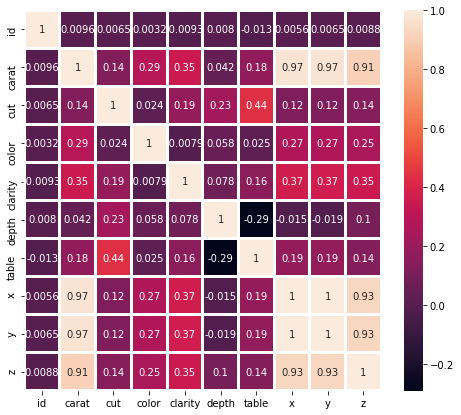

In [36]:
import matplotlib.pyplot as plt
fig, ax_newCorr = plt.subplots(figsize=(8,7))  
ax_newCorr = sns.heatmap(newCorr, annot = True, linewidths=2)